This notebook creates bar plots that visualize how various benchmark algorithms compare against NCMF, in terms of AUC and MRR.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
def get_err_sd_list(fname,exp_idx_list):
    print("fname: ",fname)
    #create list of rmse/error and sd - one per pair per technique
    if "random" in fname:
        with open(fname) as f:
            data = json.load(f)
        df = pd.DataFrame(data).T
        df = df[:5]
        df.columns = ["params","avg_rmse_test","rmse_train","sd_test","sd_train"]
        df.index = df.index.map(float)
        df = df.sort_index()
    else:
        df = pd.read_json(fname).T
        df.index = df.index.map(float)
        df = df.sort_index()
    #idx of 3 experiments whose results has to be included in the chart
    exp_idx_list = list(np.array([exp_idx_list]) - 1)
    exp_rmse_list = []
    exp_sd_list = []
    for temp_idx in exp_idx_list:
        exp_rmse_list.append(df.iloc[temp_idx]["avg_rmse_test"])
        exp_sd_list.append(df.iloc[temp_idx]["sd_test"])    
    return list(np.array(exp_rmse_list)[0]), list(np.array(exp_sd_list)[0])  

SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE1 = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname):
    ax = plt.subplot()
    temp_offset = 0.20
    b_list = []
    hatch_type_list = ['++','\\\\\\','xx','..','--', '||', '///']
    for i in np.arange(y_list.shape[0]):
        b1 = ax.bar(x+(i*temp_offset), y_list[i],width=temp_offset,color=color_list[i],align='center',hatch=hatch_type_list[i],linewidth=1)
        ax.errorbar(x+(i*temp_offset), y_list[i], yerr = e_list[i], color = 'k', ls = 'none', lw = 2, capthick = 2,fmt='--')
        b_list.append(b1)
    
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(x + (temp_offset * 1.5))
    ax.set_xticklabels(x_tick_labels)
    ax.set_ylim([0.3,1])
    text_offset = 0.20
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for i in range(y_list.shape[0]):
        plt.text(x+(i*text_offset) -0.075, y_list[i][0]+0.03, str(y_list[i][0]*100)[:5], fontsize=15)
        
#     ax.legend(tuple(b_list), tuple(tech_list), loc='upper left', ncol = 1, bbox_to_anchor = (1,1))
    plt.savefig(save_fname+".svg",bbox_inches = "tight")
    plt.savefig(save_fname+".png",bbox_inches = "tight")
    return plt

In [3]:
# PubMed dataset - AUC
pubmed_auc_list_metapath = [0.6109]
pubmed_auc_sd_list_metapath = [0.0513]
pubmed_auc_list_hin2vec = [0.8162]
pubmed_auc_sd_list_hin2vec = [0.0434]
pubmed_auc_list_conve = [0.8025]
pubmed_auc_sd_list_conve = [0.0225]
pubmed_auc_list_transe = [0.7456]
pubmed_auc_sd_list_transe = [0.0507]
pubmed_auc_list_rgcn = [0.6019]
pubmed_auc_sd_list_rgcn = [0.1116]
pubmed_auc_list_hgt = [0.6736]
pubmed_auc_sd_list_hgt = [0.1601]
pubmed_auc_list_ncmf = [0.8596]
pubmed_auc_sd_list_ncmf = [0.0199]

# PubMed dataset - MRR
pubmed_mrr_list_metapath = [0.8087]
pubmed_mrr_sd_list_metapath = [0.0472]
pubmed_mrr_list_hin2vec = [0.9347]
pubmed_mrr_sd_list_hin2vec = [0.0288]
pubmed_mrr_list_conve = [0.9340]
pubmed_mrr_sd_list_conve = [0.0130]
pubmed_mrr_list_transe = [0.9084]
pubmed_mrr_sd_list_transe = [0.0672]
pubmed_mrr_list_rgcn = [0.8052]
pubmed_mrr_sd_list_rgcn = [0.0635]
pubmed_mrr_list_hgt = [0.8517]
pubmed_mrr_sd_list_hgt = [0.0921]
pubmed_mrr_list_ncmf = [0.9603]
pubmed_mrr_sd_list_ncmf = [0.0150]

In [4]:
x = np.array([1])
y_list = np.array([pubmed_auc_list_metapath,pubmed_auc_list_hin2vec, pubmed_auc_list_conve, pubmed_auc_list_transe, pubmed_auc_list_rgcn, pubmed_auc_list_hgt, pubmed_auc_list_ncmf]) 
e_list = np.array([pubmed_auc_sd_list_metapath,pubmed_auc_sd_list_hin2vec, pubmed_auc_sd_list_conve, pubmed_auc_sd_list_transe, pubmed_auc_sd_list_rgcn, pubmed_auc_sd_list_hgt, pubmed_auc_sd_list_ncmf])

In [5]:
color_list= ['lightgrey','lightskyblue','lightgreen','lightsalmon', 'lightsteelblue', 'lightpink', 'lightyellow']
tech_list = ['metapath2vec','hin2vec','ConvE','TransE','R-GCN', 'HGT', 'NCMF']
y_label = 'AUC'

<Figure size 432x288 with 0 Axes>

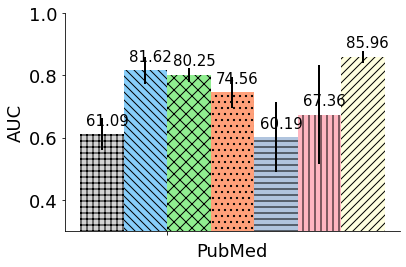

In [6]:
x_label = 'PubMed'
save_fname = "PubMed_HNE_AUC"
x_tick_labels = ()
fig = plt.figure("Line plot")
legendFig = plt.figure("Legend plot")
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)
# ax = fig.add_subplot(111)
# temp_offset = 0.17
# b_list = []
# hatch_type_list = ['++','\\\\\\','xx','..','///']
# for i in np.arange(y_list.shape[0]):
#     b1 = ax.bar(x+(i*temp_offset), y_list[i],width=temp_offset,color=color_list[i],align='center',hatch=hatch_type_list[i],linewidth=1)
#     b_list.append(b1)
# # legendFig.legend(tuple(b_list), tuple(tech_list), loc='upper center', ncol = 3, mode = 'expand')
# legendFig.savefig(save_fname)

In [7]:
x = np.array([1])
y_list = np.array([pubmed_mrr_list_metapath,pubmed_mrr_list_hin2vec, pubmed_mrr_list_conve, pubmed_mrr_list_transe, pubmed_mrr_list_rgcn, pubmed_mrr_list_hgt, pubmed_mrr_list_ncmf]) 
e_list = np.array([pubmed_mrr_sd_list_metapath,pubmed_mrr_sd_list_hin2vec, pubmed_mrr_sd_list_conve, pubmed_mrr_sd_list_transe, pubmed_mrr_sd_list_rgcn, pubmed_mrr_sd_list_hgt, pubmed_mrr_sd_list_ncmf])

In [8]:
y_label = 'MRR'

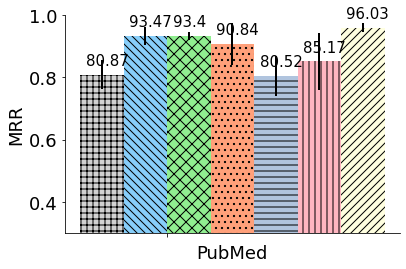

In [9]:
x_label = 'PubMed'
save_fname = "PubMed_HNE_MRR"
x_tick_labels = ()
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)

In [10]:
# MIMIC dataset - AUC
mimic_auc_list_metapath = [0.8373]
mimic_auc_sd_list_metapath = [0.0027]
mimic_auc_list_hin2vec = [0.6374]
mimic_auc_sd_list_hin2vec = [0.0118]
mimic_auc_list_conve = [0.8444]
mimic_auc_sd_list_conve = [0.0035]
mimic_auc_list_transe = [0.6865]
mimic_auc_sd_list_transe = [0.0127]
mimic_auc_list_rgcn = [0.5786]
mimic_auc_sd_list_rgcn = [0.0086]
mimic_auc_list_hgt = [0.8656]
mimic_auc_sd_list_hgt = [0.0014]
mimic_auc_list_ncmf = [0.8606]
mimic_auc_sd_list_ncmf = [0.0023]

# MIMIC dataset - MRR
mimic_mrr_list_metapath = [0.8707]
mimic_mrr_sd_list_metapath = [0.0044]
mimic_mrr_list_hin2vec = [0.7988]
mimic_mrr_sd_list_hin2vec = [0.0084]
mimic_mrr_list_conve = [0.8854]
mimic_mrr_sd_list_conve = [0.0036]
mimic_mrr_list_transe = [0.7084]
mimic_mrr_sd_list_transe = [0.0109]
mimic_mrr_list_rgcn = [0.6721]
mimic_mrr_sd_list_rgcn = [0.0387]
mimic_mrr_list_hgt = [0.8912]
mimic_mrr_sd_list_hgt = [0.0076]
mimic_mrr_list_ncmf = [0.9099]
mimic_mrr_sd_list_ncmf = [0.0127]

In [11]:
x = np.array([1])
y_list = np.array([mimic_auc_list_metapath,mimic_auc_list_hin2vec, mimic_auc_list_conve, mimic_auc_list_transe, mimic_auc_list_rgcn, mimic_auc_list_hgt, mimic_auc_list_ncmf]) 
e_list = np.array([mimic_auc_sd_list_metapath,mimic_auc_sd_list_hin2vec, mimic_auc_sd_list_conve, mimic_auc_sd_list_transe, mimic_auc_sd_list_rgcn, mimic_auc_sd_list_hgt, mimic_auc_sd_list_ncmf])

In [12]:
color_list= ['lightgrey','lightskyblue','lightgreen','lightsalmon', 'lightsteelblue', 'lightpink', 'lightyellow']
tech_list = ['metapath2vec','hin2vec','ConvE','TransE','R-GCN', 'HGT', 'NCMF']
y_label = 'AUC'

<Figure size 432x288 with 0 Axes>

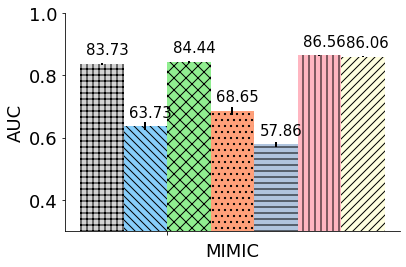

In [13]:
x_label = 'MIMIC'
save_fname = "MIMIC_HNE_AUC"
x_tick_labels = ()
fig = plt.figure("Line plot")
legendFig = plt.figure("Legend plot")
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)


In [14]:
x = np.array([1])
y_list = np.array([mimic_mrr_list_metapath,mimic_mrr_list_hin2vec, mimic_mrr_list_conve, mimic_mrr_list_transe, mimic_mrr_list_rgcn, mimic_mrr_list_hgt, mimic_mrr_list_ncmf]) 
e_list = np.array([mimic_mrr_sd_list_metapath,mimic_mrr_sd_list_hin2vec, mimic_mrr_sd_list_conve, mimic_mrr_sd_list_transe, mimic_mrr_sd_list_rgcn, mimic_mrr_sd_list_hgt, mimic_mrr_sd_list_ncmf])

In [15]:
y_label = 'MRR'

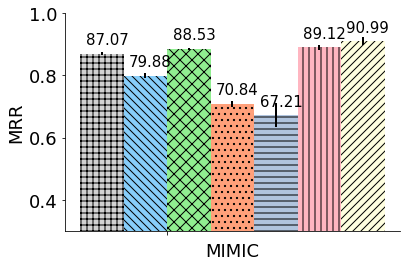

In [16]:
x_label = 'MIMIC'
save_fname = "MIMIC_HNE_MRR"
x_tick_labels = ()
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)

In [17]:
# Polypharmacy dataset - AUC
polypharmacy_auc_list_metapath = [0.4989]
polypharmacy_auc_sd_list_metapath = [0.0002]
polypharmacy_auc_list_hin2vec = [0.6082]
polypharmacy_auc_sd_list_hin2vec = [0.0186]
polypharmacy_auc_list_conve = [0.8107]
polypharmacy_auc_sd_list_conve = [0.0036]
polypharmacy_auc_list_transe = [0.6857]
polypharmacy_auc_sd_list_transe = [0.0037]
polypharmacy_auc_list_rgcn = [0.5018]
polypharmacy_auc_sd_list_rgcn = [0.0008]
polypharmacy_auc_list_hgt = [0.8405]
polypharmacy_auc_sd_list_hgt = [0.0034]
polypharmacy_auc_list_ncmf = [0.8459]
polypharmacy_auc_sd_list_ncmf = [0.0041]

# Polypharmacy dataset - MRR
polypharmacy_mrr_list_metapath = [0.3179]
polypharmacy_mrr_sd_list_metapath = [0.0149]
polypharmacy_mrr_list_hin2vec = [0.6826]
polypharmacy_mrr_sd_list_hin2vec = [0.0268]
polypharmacy_mrr_list_conve = [0.8448]
polypharmacy_mrr_sd_list_conve = [0.0121]
polypharmacy_mrr_list_transe = [0.5823]
polypharmacy_mrr_sd_list_transe = [0.0024]
polypharmacy_mrr_list_rgcn = [0.5246]
polypharmacy_mrr_sd_list_rgcn = [0.0080]
polypharmacy_mrr_list_hgt = [0.8498]
polypharmacy_mrr_sd_list_hgt = [0.0080]
polypharmacy_mrr_list_ncmf = [0.9035]
polypharmacy_mrr_sd_list_ncmf = [0.0008]

In [18]:
x = np.array([1])
y_list = np.array([polypharmacy_auc_list_metapath,polypharmacy_auc_list_hin2vec, polypharmacy_auc_list_conve, polypharmacy_auc_list_transe, polypharmacy_auc_list_rgcn, polypharmacy_auc_list_hgt, polypharmacy_auc_list_ncmf]) 
e_list = np.array([polypharmacy_auc_sd_list_metapath,polypharmacy_auc_sd_list_hin2vec, polypharmacy_auc_sd_list_conve, polypharmacy_auc_sd_list_transe, polypharmacy_auc_sd_list_rgcn, polypharmacy_auc_sd_list_hgt, polypharmacy_auc_sd_list_ncmf])

In [19]:
color_list= ['lightgrey','lightskyblue','lightgreen','lightsalmon', 'lightsteelblue', 'lightpink', 'lightyellow']
tech_list = ['metapath2vec','hin2vec','ConvE','TransE','R-GCN', 'HGT', 'NCMF']
y_label = 'AUC'

<Figure size 432x288 with 0 Axes>

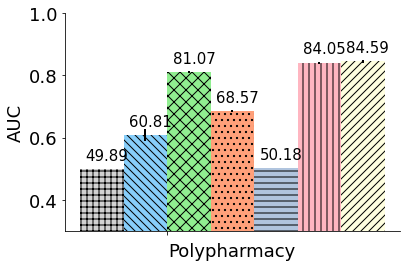

In [20]:
x_label = 'Polypharmacy'
save_fname = "Polypharmacy_HNE_AUC"
x_tick_labels = ()
fig = plt.figure("Line plot")
legendFig = plt.figure("Legend plot")
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)


In [21]:
x = np.array([1])
y_list = np.array([polypharmacy_mrr_list_metapath,polypharmacy_mrr_list_hin2vec, polypharmacy_mrr_list_conve, polypharmacy_mrr_list_transe, polypharmacy_mrr_list_rgcn, polypharmacy_mrr_list_hgt, polypharmacy_mrr_list_ncmf]) 
e_list = np.array([polypharmacy_mrr_sd_list_metapath,polypharmacy_mrr_sd_list_hin2vec, polypharmacy_mrr_sd_list_conve, polypharmacy_mrr_sd_list_transe, polypharmacy_mrr_sd_list_rgcn, polypharmacy_mrr_sd_list_hgt, polypharmacy_mrr_sd_list_ncmf])

In [22]:
y_label = 'MRR'

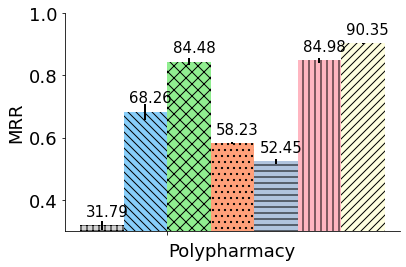

In [23]:
x_label = 'Polypharmacy'
save_fname = "Polypharmacy_HNE_MRR"
x_tick_labels = ()
plt = draw_chart(plt,\
               x,y_list,\
               x_tick_labels,y_label,x_label,\
               tech_list,color_list,\
               save_fname)

In [24]:
temp_offset = 0.17
b_list = []
ax = fig.add_subplot(111)
hatch_type_list = ['++','\\\\\\','xx','..','--', '||', '///']
for i in np.arange(y_list.shape[0]):
    b1 = ax.bar(x+(i*temp_offset), y_list[i],width=temp_offset,color=color_list[i],align='center',hatch=hatch_type_list[i],linewidth=1)
    ax.errorbar(x+(i*temp_offset), y_list[i], yerr = e_list[i], color = 'k', ls = 'none', lw = 2, capthick = 2,fmt='--')
    b_list.append(b1)

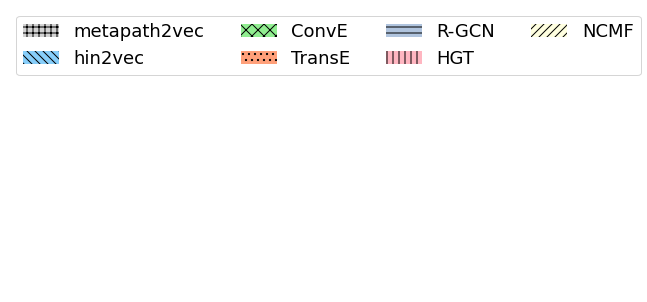

In [25]:
import matplotlib
leg = plt.legend(tuple(b_list), tuple(tech_list), loc='upper left', ncol = 4, bbox_to_anchor = (0,1))
plt.setp(plt.gca().spines.values(), visible=False) 
# plt.gca().get_xaxis().set_visible(False)
# plt.gca().get_yaxis().set_visible(False)
plt.axis('off')
plt.tight_layout(pad=0)
# bbox = matplotlib.transforms.Bbox(np.array(((0, 1),(0.5, 1))));
plt.savefig("hne_legend.png", bbox_inches="tight")
plt.show()